In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline

/home/dheeraj/my-repos/kaggle-census/env/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('dataset/adult-census.csv')

In [3]:
print df.shape
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# change header to camel case
headers = df.columns.tolist()
headers = [header.replace('.', '_') for header in headers]
df.columns = headers
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# null counts
df.apply(lambda x: x.size - x.count(), axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
# number of rows without occupation ('?' as occupation)
print df[df.occupation == '?'].shape

(1843, 15)


In [7]:
# remove rows without occupation
data = df[df.occupation != '?']

In [8]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [9]:
features_to_encode = ['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                      'race', 'sex', 'native_country']
le = LabelEncoder()

data[features_to_encode] = data[features_to_encode].apply(le.fit_transform)
data.head()

/home/dheeraj/my-repos/kaggle-census/env/local/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,39,<=50K
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,39,<=50K
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,39,<=50K
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,39,<=50K
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,39,<=50K


In [10]:
x_features = data.columns.tolist()
x_features.remove('income')

X = data[x_features]
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [11]:
n_range = np.arange(1, 60)
scores = []

for n in n_range:
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
best_score_idx = scores.index(max(scores))
best_n = n_range[best_score_idx]
print "best score is", scores[best_score_idx]
print "best value for 'n_estimators' is", best_n

best value for 'n_estimators' is 42


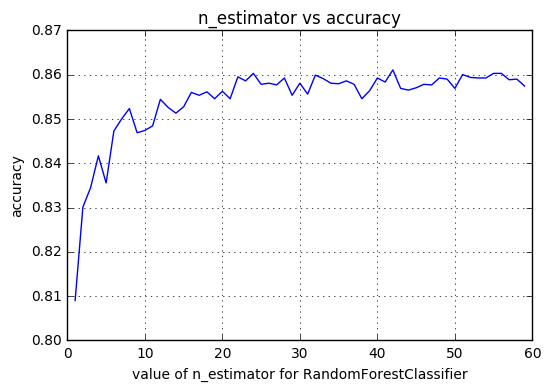

In [12]:
# plotting n_estimators vs accuracy graph to know how accuracy varies with n_estimators value
plt.plot(n_range, scores)
plt.xlabel('value of n_estimator for RandomForestClassifier')
plt.ylabel('accuracy')
plt.grid(True)
plt.title('n_estimator vs accuracy')
plt.show()

In [22]:
rfc = RandomForestClassifier(n_estimators=40)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [14]:
def print_confusion_matrix(y_test, y_pred):
    """
    Prints confusion matrix of real and predicted y values
    """
    print "\n"
    print "confusion matrix", "*" * 60
    print "\n"
    print confusion_matrix(y_test, y_pred)

def print_classification_report(y_test, y_pred):
    """
    Prints classification report of real and predicted y values
    """
    print "\n"
    print "classification report", "*" * 60
    print "\n"
    print classification_report(y_test, y_pred)

print_confusion_matrix(y_test, y_pred)
print_classification_report(y_test, y_pred)



confusion matrix ************************************************************


[[5388  387]
 [ 712 1193]]


classification report ************************************************************


             precision    recall  f1-score   support

      <=50K       0.88      0.93      0.91      5775
       >50K       0.76      0.63      0.68      1905

avg / total       0.85      0.86      0.85      7680



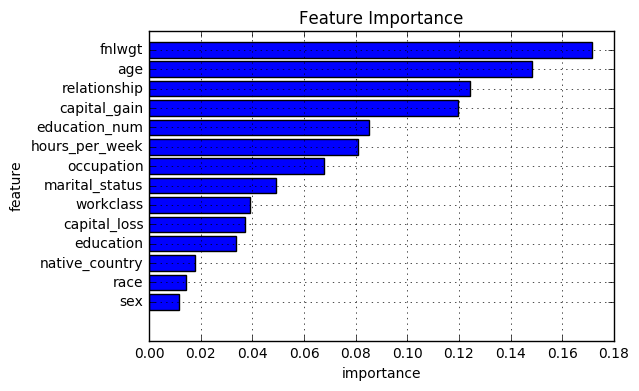

In [15]:
# plot feature importance

def plot_feature_importance(importances, features):
    """
    Plot the feature importances as a horizontal bar chart (in ascending order)
    x-axis = value of feature importance passed as the var 'importances'
    y-axis = feature name as labels passed as the var 'features'
    """
    sorted_idx = np.argsort(importances)
    sorted_importance = importances[sorted_idx]
    sorted_features = np.array(features)[sorted_idx]
    plt.barh(np.arange(len(sorted_importance)), sorted_importance,
         align='center')
    plt.yticks(range(len(sorted_features)), sorted_features)
    plt.xlabel("importance")
    plt.ylabel("feature")
    plt.title("Feature Importance")
    plt.grid()
    plt.show()

feature_importance = rfc.feature_importances_
plot_feature_importance(feature_importance, x_features)

In [16]:
# apply logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print_confusion_matrix(y_test, y_pred)
print_classification_report(y_test, y_pred)



confusion matrix ************************************************************


[[5550  225]
 [1360  545]]


classification report ************************************************************


             precision    recall  f1-score   support

      <=50K       0.80      0.96      0.88      5775
       >50K       0.71      0.29      0.41      1905

avg / total       0.78      0.79      0.76      7680



In [17]:
# try to find most relevant features using RFE
log_reg = LogisticRegression()
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X, y)

print rfe.support_
print rfe.ranking_
print X.columns[rfe.support_]

[False False False False  True  True False  True  True  True False False
 False False]
[ 3  2 10  5  1  1  7  1  1  1  9  8  4  6]
Index([u'education_num', u'marital_status', u'relationship', u'race', u'sex'], dtype='object')


In [18]:
# apply logistic regression again with the features found using RFE
new_features = X.columns[rfe.support_]
log_reg.fit(X_train[new_features], y_train)
y_pred = log_reg.predict(X_test[new_features])
print_confusion_matrix(y_test, y_pred)
print_classification_report(y_test, y_pred)



confusion matrix ************************************************************


[[5381  394]
 [1083  822]]


classification report ************************************************************


             precision    recall  f1-score   support

      <=50K       0.83      0.93      0.88      5775
       >50K       0.68      0.43      0.53      1905

avg / total       0.79      0.81      0.79      7680





confusion matrix ************************************************************


[[5314  461]
 [ 713 1192]]


classification report ************************************************************


             precision    recall  f1-score   support

      <=50K       0.88      0.92      0.90      5775
       >50K       0.72      0.63      0.67      1905

avg / total       0.84      0.85      0.84      7680



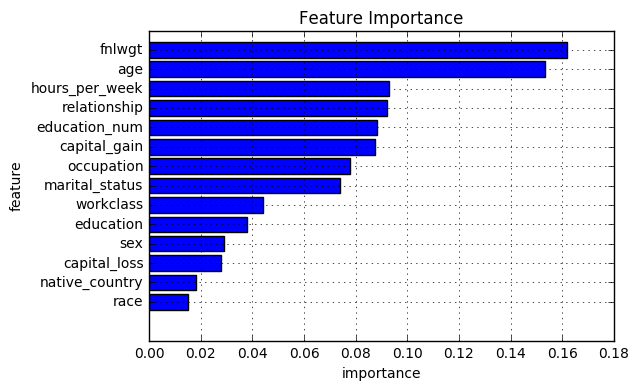

In [19]:
# using extra tree classifiers
etc = ExtraTreesClassifier(n_estimators=64)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print_confusion_matrix(y_test, y_pred)
print_classification_report(y_test, y_pred)
plot_feature_importance(etc.feature_importances_, x_features)

In [25]:
k_range = np.arange(1, 30)
scores = []

for k in k_range:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

best_score_idx = scores.index(max(scores))
best_k = k_range[best_score_idx]
print "best score is", scores[best_score_idx]
print "best value for 'n_neighbors' is", best_k

best score is 0.794010416667
best value for 'n_neighbors' is 19


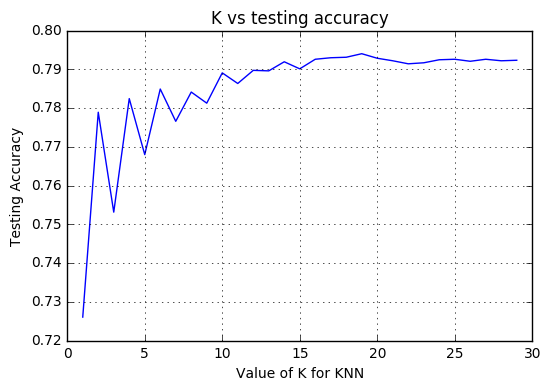

In [26]:
# relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.title('K vs testing accuracy')
plt.show()